## Michaela Allen $-$ PHYS 513: Homework 3

1. Newman 6.3: LU Decomposition $-$ This exercise invites you to write your own program to solve simultaneous equations using the method of LU decomposition. <br>
$a)$ Starting, if you wish, with the program for Gaussian elimination in Example 6.1 on page 218, write a Python function that calculates the LU decomposition of a matrix. The calculation is same as that for Gaussian elimination, except that at each step of the calculation you need to extract the appropriate elements of the matrix and assemble them to form the lower diagonal matrix $\textbf{L}$ of Eq. (6.32). Test your function by calculating the LU decomposition of the matrix from Eq. (6.2), then multiplying the $\textbf{L}$ and $\textbf{U}$ you get and verifying that you recover the original matrix once more. <br>
<br>
$b)$ Build on your LU decomposition function to create a complete program to solve Eq. (6.2) by performing a double backsubstitution as described in this section. Solve the same equations using the function $\verb|solve|$ from the $\verb|numpy|$ package and verify that you get the same answer either way.

In [15]:
# 1: Newman 6.3 --- a)

# necessary imports:

import numpy as np

# matrix we are solving defined and other needed definitions:

A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

print('Matrix A we want to solve is: \n', A)

v = np.array([ -4, 3, 9, 7 ],float)

print('v = ', v, '\n')

N = len(v)

L = np.zeros((N, N)) # making an empty array for L
L[:,0] = A[:,0] # first column of L is first column of A

# now using the Gaussian elimination code from textbook to write function to calculate the LU decomposition:

def LU_decomp(A, v, N):

    for m in range(N):

        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
         
        if m < N-1: # this is actually making the L matrix
            L[m+1:,m+1] = A[m+1:, m+1]

    # now we need to define our U matrix --- at this point, U is just what we have done to original matrix A:

    U = A

    # Backsubstitution (again from code in textbook):

    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
    
    return x

# now use this function to solve x:

x_solved = LU_decomp(A, v, N)

# now calculate L*U to make sure it is the same as A:

U = A
LU = np.matmul(L, U)

print('L matrix is: \n', L, '\n')
print('U matrix is: \n', U, '\n')
print('LU matrix is: \n', LU, '\n')
print('The vector x =', x_solved)

Matrix A we want to solve is: 
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
v =  [-4.  3.  9.  7.] 

L matrix is: 
 [[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]] 

U matrix is: 
 [[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]] 

LU matrix is: 
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]] 

The vector x = [ 2. -1. -2.  1.]


In [17]:
# 1: Newman 6.3 --- b)

# necessary imports:

import numpy as np
from numpy.linalg import solve

# matrix we are solving defined and other needed definitions:

A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

print('Matrix A we want to solve is: \n', A)

v = np.array([ -4, 3, 9, 7 ],float)

print('v = ', v, '\n')

N = len(v)

L = np.zeros((N, N)) # making an empty array for L
L[:,0] = A[:,0] # first column of L is first column of A

# now using the Gaussian elimination code from textbook to write function to calculate the LU decomposition:

def LU_decomp(A, v, N):

    for m in range(N):

        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
         
        if m < N-1: # this is actually making the L matrix
            L[m+1:,m+1] = A[m+1:, m+1]

    # now we need to define our U matrix --- at this point, U is just what we have done to original matrix A:

    U = A

    # now, use double backsubstitution --- eq.s 6.35 and 6.36, pg. 226:
    
    y = np.empty(N, float)
    for m in range(N-1,-1,-1):
        y[m] = v[m]
        for i in range(m+1,N):
            y[m] -= U[m,i]*y[i]

    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = y[m]
        for i in range(m+1,N):
            x[m] -= L[m,i]*x[i]
    
    return x

# now use this function to solve x:

x_solved = LU_decomp(A, v, N)

# now calculate L*U to make sure it is the same as A:

U = A
LU = np.matmul(L, U)

print('L matrix is: \n', L, '\n')
print('U matrix is: \n', U, '\n')
print('LU matrix is: \n', LU, '\n')
print('The vector x =', x_solved, '\n')

##################################

# now use numpy solve to solve for x:

numpy_x = solve(A, v) # it's almost painful that we had to write our own code to do this, when all we need is one line

print('The vector x calculated using numpy solve =', numpy_x)

Matrix A we want to solve is: 
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
v =  [-4.  3.  9.  7.] 

L matrix is: 
 [[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]] 

U matrix is: 
 [[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]] 

LU matrix is: 
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]] 

The vector x = [ 2. -1. -2.  1.] 

The vector x calculated using numpy solve = [ 2. -1. -2.  1.]


---

2. Newman 6.7: A chain of resistors $-$ Consider a long chain of resistors wired up (pg. 240). All the resistors have the same resistance $R$. The power rail at the top is at voltage $V_+ = 5V$. The problem is to find the voltages $V_1 ... V_N$ at the internal points in the circuit. <br>
<br>
$a)$ Using Ohm's law and the Kirchhoff current law, which says that the total net current flow out of (or into) any junction in a circuit must be zero, show that the voltages $V_1 ... V_N$ satisfy the equations    $$\begin{align*}
3V_1 - V_2 - V_3 &= V_+, \\
-V_1 + 4V_2 - V_3 - V_4 &= V_+, \\
                        &\hspace{0.6em}\vdots \\
-V_{i-2} - V_{i-1} + 4V_i - V_{i+1} - V_{i+2} &= 0, \\
                        &\hspace{0.6em}\vdots \\
-V_{N-3} - V_{N-2} + 4V_{N-1} - V_N &= 0, \\
-V_{N-2} - V_{N-1} + 3V_N &= 0.
\end{align*}$$ <br>
Express these equations in vector form $\textbf{Av} = \textbf{w}$ and find the values of the matrix $\textbf{A}$ and the vector $\textbf{w}$. <br>
<br>
$b)$ Write a program to solve for the values of the $V_i$ when there are $N = 6$ internal junctions with unknown voltages. (Hint: All the values of $V_i$ should lie between zero and 5V. If they don't, something is wrong.) <br>
<br>
$c)$ Now repeat your calculation for the case where there are $N = 10000$ internal junctions. This part is not possible using standard tools like the $\verb|solve|$ function. You need to make use of the fact that the matrix $\textbf{A}$ is banded and use the $\verb|banded|$ function from the file $\verb|banded.py|$ discussed in Appendix E.
                                               

In [18]:
# 2: Newman 6.7 --- b)

# necessary imports:

import numpy as np
from numpy import copy
import matplotlib.pyplot as plt

# define constants:

N = 6
V_plus = 5 # [V]

# now create our matrix, A (first just fill with zeros):

A = np.zeros([5, N], float)

# using for loops to set values to certain positions:

for i in range(2, N):
    A[0, i] = -1

for i in range(1, N):
    A[1, i] = -1

for i in range(1, N-1):
    A[2, i] = 4

for i in range(N-1):
    A[3, i] = -1

for i in range(N-2):
    A[4, i] = -1

# now setting the value to three in the first and last positions of row 3:

A[2, 0] = 3
A[2, N-1] = 3

# define our v:

v = np.zeros(N, float)
v[0] = V_plus
v[1] = V_plus

# using banded function from textbook online resources:

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

# now solve using this function to get our solution:

solution = banded(A, v, 2, 2)

print('Values of Vi for N equal to 6 =', solution, '[V]') # all values are between 0 and 5

Values of Vi for N equal to 6 = [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ] [V]


In [19]:
# 2: Newman 6.7 --- c)

# necessary imports:

import numpy as np
from numpy import copy

# define constants:

N = 10000
V_plus = 5 # [V]

# now create our matrix, A (first just fill with zeros):

A = np.zeros([5, N], float)

# using for loops to set values to certain positions:

for i in range(2, N):
    A[0, i] = -1

for i in range(1, N):
    A[1, i] = -1

for i in range(1, N-1):
    A[2, i] = 4

for i in range(N-1):
    A[3, i] = -1

for i in range(N-2):
    A[4, i] = -1

# now setting the value to three in the first and last positions of row 3:

A[2, 0] = 3
A[2, N-1] = 3

# define our v:

v = np.zeros(N, float)
v[0] = V_plus
v[1] = V_plus

# using banded function from textbook online resources:

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

# now solve using this function to get our solution:

solution = banded(A, v, 2, 2)

print('Values of Vi for N equal to 10000 =', solution, '[V]') # all values are between 0 and 5

Values of Vi for N equal to 10000 = [4.99888228e+00 4.99861842e+00 4.99802841e+00 ... 1.97158611e-03
 1.38158071e-03 1.11772227e-03] [V]


---

## EXTRA CREDIT - I did not do this one##
3. Newman 6.8: The QR algorithim $-$ In this exercise you'll write a program to calculate the eigenvalues and eigenvectors of a real symmetric matrix using the QR algorithim. The first challenge is to write a program that finds the QR decomposition of a matrix. Then we'll use that decomposition to find the eigenvalues. <br>
$a)$ on paper! <br>
<br>
$b)$ Write a Python function that takes as its argument a real square matrix $\textbf{A}$ and returns the two matrices $\textbf{Q}$ and $\textbf{R}$ that form its QR decomposition. As a test case, try out your function on the matrix 
$$\textbf{A} = \begin{pmatrix}
            1 & 4 & 8 & 4 \\
            4 & 2 & 3 & 7 \\
            8 & 3 & 6 & 9 \\
            4 & 7 & 9 & 2
          \end{pmatrix}.$$ <br>
Check the results by multiplying $\textbf{Q}$ and $\textbf{R}$ together to recover the original matrix $\textbf{A}$ again. <br>
<br>
$c)$ Using your function, write a complete program to calculate the eigenvalues and eigenvectors of a real symmetric matraix using the QR algorithm. Continue the calculation until the magnitude of every off-diagonal element of the matrix is smaller than $10^{-6}$. Test your program on the example matrix above. You should find that the eigenvalues are 1, 21, -3, and -8.

In [ ]:
# 3: Newman 6.8 --- b)

In [ ]:
# 3: Newman 6.8 --- c)

---

4. Newman 6.9: Asymmetric quantum well <br>
$a)$ on paper! <br>
<br>
$b)$ For the case $V(x) = ax / L$, evaluate the integral in $H_{mn}$ analytically and so find a general expression for the matrix element $H_{mn}$. Show that the matrix is real and symmetric. Write a Python program to evaluate your expression for $H_{mn}$ for arbitrary $m$ and $n$ when the particle in the well is an electron, the well has width 5 Å and $a$ = 10 eV. (The mass and charge of an electron are $9.1094 \times 10^{-31}$ kg and $1.6022 \times 10^{-19} C$ respectively.) <br>
<br>
$c)$ The matrix $\textbf{H}$ is in theory infinitely large, so we cannot calculate all its eigenvalues. But we can get a pretty accurate solution for the first few of them by cutting off the matrix after the first few elements. Modify the program you wrote for part (b) above to create a 10 $\times$ 10 array of the elements of $\textbf{H}$ up to $m,n$ = 10. Calculate the eigenvalues of this matrix using the appropriate function from $\verb|numpy.linalg|$ and hence print out, in units of electron volts, the first ten energy levels of the quantum well, within this approximation. You should find, for example, that the ground-state energy of the system is around 5.84 eV. (Hint: Bear in mind that matrix indices in Python start at zero, while the indices in standard algebraic expressions, like those above, start at one. You will need to make allowances for this in your program.) <br>
<br>
$d)$ Modify your program to use a 100 $\times$ 100 array instead and again calculate the first ten energy eigenvalues. Comparing with the values you calculated in part (c), what do you conclude about the accuracy of the calculation?

In [20]:
# 4: Newman 6.9 --- b)

# necessary imports:

import numpy as np
from scipy.constants import h
from numpy.linalg import eigvalsh

# define constants:

L = 5e-10 # [m] width
a = 10 # [eV]
e_mass = 9.1094e-31 # [kg]
e_charge = 1.6022e-19 # [C]
h_bar = h / (2*np.pi)
aj = a * e_charge # [J] a in joules

# now actually evaluate Hmn:

def solve_h(m, n):
    if n == m:
        return (((np.pi**2) * (n**2) * (h_bar**2)) / (2*e_mass*(L**2))) + (aj/2)
            
    elif not n % 2 == m % 2:
        return -(8 * m * n * aj) / ((np.pi**2) * (m**2 - n**2)**2)
        
    else:
        return 0.0        

In [21]:
# 4: Newman 6.9 --- c)

H = np.zeros((10, 10))

for n in range(10):
    for m in range(10):
         H[m, n] = solve_h(m+1, n+1)

vals = eigvalsh(H)

for i in range(0, len(vals), 1):
    vals_eV = vals[i] / e_charge # just converting back to eV here
    print('For n =', i+1, ', the eigenvalue is', vals_eV, '[eV]')

For n = 1 , the eigenvalue is 5.836342711055191 [eV]
For n = 2 , the eigenvalue is 11.18099553547731 [eV]
For n = 3 , the eigenvalue is 18.66267147822128 [eV]
For n = 4 , the eigenvalue is 29.143804209574693 [eV]
For n = 5 , the eigenvalue is 42.65445878221471 [eV]
For n = 6 , the eigenvalue is 59.18437006393354 [eV]
For n = 7 , the eigenvalue is 78.72815148052501 [eV]
For n = 8 , the eigenvalue is 101.28390488307029 [eV]
For n = 9 , the eigenvalue is 126.84938723024547 [eV]
For n = 10 , the eigenvalue is 155.5528635233465 [eV]


In [22]:
# 4: Newman 6.9 --- d)

H = np.zeros((100, 100))

for n in range(100):
    for m in range(100):
         H[m, n] = solve_h(m+1, n+1)

vals_100 = eigvalsh(H)

for i in range(0, 10):
    vals_100_eV = vals_100[i] / e_charge # just converting back to eV here
    print('For n =', i+1, ', the eigenvalue is', vals_100_eV, '[eV]')

For n = 1 , the eigenvalue is 5.836342310366031 [eV]
For n = 2 , the eigenvalue is 11.180994212185439 [eV]
For n = 3 , the eigenvalue is 18.662669607177317 [eV]
For n = 4 , the eigenvalue is 29.143795409777166 [eV]
For n = 5 , the eigenvalue is 42.65444966194203 [eV]
For n = 6 , the eigenvalue is 59.18431748004013 [eV]
For n = 7 , the eigenvalue is 78.72809965249574 [eV]
For n = 8 , the eigenvalue is 101.28327394085144 [eV]
For n = 9 , the eigenvalue is 126.84855488183526 [eV]
For n = 10 , the eigenvalue is 155.42323893833495 [eV]


---

## EXTRA CREDIT -- I did part a and part of b (both on paper) ##
5. Newman 6.12: The biochemical process of $\textit{glycolysis}$, the breakdown of glucose in the body to release energy, can be modeled by the equations $$ \frac{dx}{dt} = -x + ay + x^{2}y, \quad \frac{dy}{dt} = b - ay - x^{2}y. $$ <br>
Here $x$ and $y$ represent concentraitions of two chemicals, ADP, and F6P, and $a$ and $b$ are positive constants. One of the important features of nonlinear linear equations like these is their $\textit{stationary points}$, meaning values of $x$ and $y$ at which the derivatives of both variables become zero simultaneously, so that the variables stop changing and become constant in time. Setting the derivatives to zero above, the stationary points of our glycolysis equations are solutions of $$ -x + ay + x^{2}y = 0, \quad b - ay - x^{2}y = 0 . $$ <br>
<br>
$a)$ on paper! <br>
<br>
$b)$ Show that the equations can be rearranged to read $$ x = y(a + x^{2}), \quad y = \frac{b}{a + x^{2}} $$ and write a program to solve these for the stationary point using the relaxation method with $a$ = 1 and $b$ = 2. You should find that the method fails to converge to a solution in this case. <br>
<br>
$c)$ Find a different way to rearrange the equations such that when you apply the relaxation method again it now converges to a fixed point and gives a solution. Verify that the solution you get agrees with part(a).

---

6. Newman 6.13: Wien's displacement constant <br>
$a)$ on paper! <br>
<br>
$b)$ Write a program to solve this equation to an accuracy of $ \epsilon = 10^{-6} $ using the binary search method, and hence find a value for the displacement constant. <br>
<br>
$c)$ The displacement law is the basis for the method of $\textit{optical pyrometry}$, a method for measuring the temperatures of objects by observing the color of the thermal radiation they emit. The method is commonly used to estimate the surface temperatures of astronomical bodies, such as the Sun. The wavelength peak in the Sun's emitted radiation falls at $ \lambda $ = 502 nm. From the equations above and your value of the displacement constant, estimate the surface temperature of the Sun. 

In [23]:
# 6: Newman 6.13 --- b)
# using steps on page 264

# necessary imports:

import numpy as np
from scipy.constants import k,c,h

# define constants:

epsilon = 1e-6 # target accuracy
x1 = 1
x2 = 10

# define function that is the equation we want to solve:

def f(x):
    return 5*np.exp(-x) + x - 5

# while loop to keep track of how many iterations we want
# first calculating intital midpoint and values of the function at the midpoint, x1, and x2
# if and elif statements for when to set x1 or x2 to midpoint, and when to stop iterating

while abs(x1 - x2) > epsilon:
    midpoint = (x1 + x2) / 2
    f_mid = f(midpoint)
    f_x1 = f(x1)
    f_x2 = f(x2)
    
    if f_mid > 0 and f_x1 > 0 or f_mid < 0 and f_x1 < 0:
        x1 = midpoint
    elif f_mid > 0 and f_x1 < 0 or f_mid < 0 and f_x1 > 0:
        x2 = midpoint
    elif abs(midpoint) < epsilon:
        midpoint = (x1 - x2) / 2

print("Value of x =", midpoint)

# now calculate value of b, displacement constant:

b = (h*c) / (k*midpoint) # [mK]

print("Wien's Displacement Constant =", b, '[mK]') 

Value of x = 4.965114414691925
Wien's Displacement Constant = 0.0028977728077530986 [mK]


In [24]:
# 6: Newman 6.13 --- c)

# using value of displacement constant above, estimate surface temp of sun:

lambda_sun = 502e-9 # in meters

T = b / lambda_sun

print("Estimated surface temperature of the Sun =", T, '[K]')

Estimated surface temperature of the Sun = 5772.455792336849 [K]


---

7. Newman 6.16: The Lagrange Point <br>
$a)$ on paper! <br>
<br>
$b)$ Write a program that uses either Newton's method or the secant method to solve for the distance $r$ from the Earth to the $L_{1}$ point. Compute a solution accurate to at least four significant figures. You will also need to choose a suitable starting value for $r$, or two starting values if you use the secant mehthod.

In [25]:
# 7: Newman 6.16 --- b)
# using the secant method (pg. 274)

# necessary imports:

import numpy as np

# define constants:

G = 6.674e-11 # [m^3 kg^-1 s^-2] gravitational constant
M = 5.974e24 # [kg] mass of Earth
m = 7.348e22 # [kg] mass of moon
R = 3.844e8 # [m] distance from Earth to moon
w = 2.662e-6 # [s^-1] angular velocity

# define function:

def lagrange(r):
    return (G*M / r**2) - (G*m / (R-r)**2) - (w**2 * r)

# guess at two starting points-- just chose two random distances between Earth and the moon

r1 = 3e4
r2 = 3e6

# now, calculate lagrange with initial guesses and calculate f prime and new guesses
# iterate over a range

for r in range(26): # after trial and error, this is the largest range I can use-- anything over is divide by zero
    lagrange_r1 = lagrange(r1)
    lagrange_r2 = lagrange(r2)

    lagrange_prime_r2 = (lagrange_r2 - lagrange_r1) / r2 - r1

    r = r2 - (lagrange_r2 * ((r2 - r1) / (lagrange_r2 - lagrange_r1)))
    
    r1, r2 = r2, r
    
print("Distance to L1 =", f'{r:.5}', '[m]')

Distance to L1 = 3.2605e+08 [m]


---

8. Newman 6.17: Nonlinear circuits <br>
$a)$ on paper! <br>
<br>
$b)$ Using Newton's method, solve the two nonlinear equations for voltages $V_{1}$ and $V_{2}$ with the conditions outlined below. Hint: You can solve Eq. (6.108) for $\delta x$ using the function $\verb|solve()|$ from the package $\verb|numpy.linalg|$ if you want to, but in this case the matrix is only a 2 $\times$ 2 matrix, so it's easy to calculate the inverse directly too. <br>
<br>
$c)$ The electronic engineer's rule of thumb for diodes is that the voltage across a (forward biased) diode is always about 0.6 volts. Confirm that your results agree with this rule.

In [26]:
# 8: Newman 6.17 --- b)

# necessary imports:

import numpy as np
from numpy.linalg import solve

# define constants:

V_plus = 5 # [V]
R1 = 1000 # [ohms]
I0 = 3e-9 # [amps]
R2 = 4000 # [ohms]
V_T = 0.05 # [V]
R3 = 3000 # [ohms]
R4 = 2000 # [ohms]

V1 = 1
V2 = 4

epsilon = 1e-6 # target accuracy
delta = 1

# define functions for voltages:

def Junction1(V1, V2):
    return V1/R1 + V1/R2 - V_plus/R1 + I0 * (np.exp((V1 - V2) / V_T) - 1)

def Junction2(V1, V2):
    return V2/R3 - V_plus/R3 + V2/R4 - I0 * (np.exp((V1 - V2) / V_T) - 1)
    

# now take derivatives of these functions with respect to V1 and V2 and define as new functions:

def Junction1_pV1(V1, V2): # d/dV1 of Junction1
    return 1/R1 + 1/R2 + ((I0)/(V_T)) * np.exp((V1 - V2) / V_T)

def Junction1_pV2(V1, V2): # d/dV2 of Junction1
    return -((I0)/(V_T)) * np.exp((V1 - V2) / V_T)

def Junction2_pV1(V1, V2): # d/dV1 of Junction2
    #return -1/R1 - 1/R2
    return -((I0)/(V_T)) * np.exp((V1 - V2) / V_T)

def Junction2_pV2(V1, V2): # d/dV2 of Junction2
    #return - 1/R3 - 1/R4
    return 1/R3 + 1/R4 + ((I0)/(V_T)) * np.exp((V1 - V2) / V_T)

# using newton's method:

while abs(delta) > epsilon:
    
    J = [[Junction1_pV1(V1, V2), Junction1_pV2(V1, V2)],
         [Junction2_pV1(V1, V2), Junction2_pV2(V1, V2)]]
    
    v = [Junction1(V1, V2), Junction2(V1, V2)]
    
    V3, V4 = np.array([V1, V2], float) - solve(J, v)
    
    delta = 0.5 * ((V3 - V1) + (V4 - V2))
    
    V1, V2 = V3, V4
    
print("V1 =", V1, '[V] \n')
print('V2 =', V2, '[V]')

V1 = 3.446954618858576 [V] 

V2 = 2.8295680717121363 [V]


In [27]:
# 8: Newman 6.17 --- c)

# to get voltage across the diode, just subtrace V2 from V1:

V_diode = V1 - V2

print("The voltage across the diode is ", V_diode, "[V]  which agrees with the engineer's rule of thumb.")

The voltage across the diode is  0.6173865471464395 [V]  which agrees with the engineer's rule of thumb.


---

9. Newman 6.18: The temperature of a light bulb <br>
$a)$ Write a Python function that takes a temperature $T$ as its argument and calculates the value $\eta$ for that temperature from the formula above. The integral in the formula cannot be done analytically, but you can do it numerically using any method of your choice. (For instance, Gaussian quadrature with 100 sample points works fine.) Use your function to make a graph of $\eta$ as a function of temperature between 300 K and 10000 K. You should see that there is an intermediate temperature where the efficiency is a maximum. <br>
<br>
$b)$ Calculate the temperature of maximum efficiency of the light bulb to within 1K using golden ratio search. (Hint: An accuracy of 1K is the equivalent of a few parts in ten thousand in this case. To get this kind of accuracy in your calculation you’ll need to use values for the fundamental constants that are suitably accurate, i.e., you will need values accurate to several significant figures.) <br>
<br>
$c)$ Is it practical to run a tungsten-filament light bulb at the temperature you found? If not, why not?

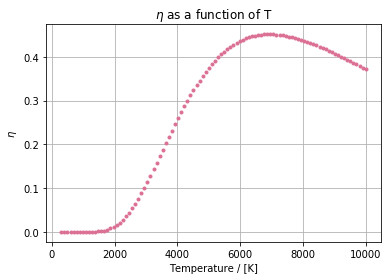

Efficiency a maximum around ~7000 K


In [28]:
# 9: Newman 6.18 --- a)

# necessary imports:

import numpy as np
from gaussxw import gaussxwab
from scipy.constants import k,c,h
import matplotlib.pyplot as plt

# define constants:

N = 100
lambda1 = 390e-9 # [m]
lambda2 = 750e-9 # [m]
constant = 15 / np.pi**4
low_limit = h*c / (lambda2 * k) # excluding T, will put in later
high_limit = h*c / (lambda1 * k) # excluding T, will put in later

# define function that is the integrand:

def f(x):
    return x**3 / (np.exp(x) - 1)

# use gaussian quadrature to solve integral-- included in function eta:

def eta(T):
    
    x, w = gaussxwab(N, low_limit/T, high_limit/T) # added in T here to limits
    
    Int = 0.0
    for i in range(N):
        Int += w[i] * f(x[i])
        
    return constant * Int

# now define T range and calc etas:

T = np.linspace(300, 10000, 100)

eta_vals = [] # empty set to append eta values to

for i in T:
    e = eta(i)
    
    eta_vals.append(e)
    
# now plot eta as a function of T:

plt.plot(T, eta_vals, '.', color='palevioletred')
plt.title('$\eta$ as a function of T')
plt.xlabel('Temperature / [K]')
plt.ylabel('$\eta$')
plt.grid()
plt.show()

print('Efficiency a maximum around ~7000 K')

In [29]:
# 9: Newman 6.18 --- b)
# golden ratio search: using steps on pg. 282

# define constants:

z = (1 + np.sqrt(5)) / 2 # golden ratio
epsilon = 1 # [K] target accuracy

# choose two initial outside points, x1 and x4 and calc interior points using golden ratio rule:

T1 = 6000 # [K]
T4 = 8000 # [K]

T2 = T4 - (T4 - T1) / z
T3 = T4 + (T4 - T1) / z

# evaluate eta at each point:

eta1 = eta(T1)
eta2 = eta(T2)
eta3 = eta(T3)
eta4 = eta(T4)

# now actually use golden ratio search:

while (T4 - T1) > epsilon:
    if eta2 < eta3:
        T4, eta4 = T3, eta3
        T3, eta3 = T2, eta2
        T2 = T4 - (T4 - T1) / z
        eta2 = eta(T2)
    else:
        T1, eta1 = T2, eta2
        T2, eta2 = T3, eta3
        T3 = T1 + (T4 - T1) / z
        eta3 = eta(T3)
        
# now average T1 and T4 to get temperature at max efficiency:

temp_max_eta = (T1 + T4) / 2

print("Temperature at maximum efficiency =", temp_max_eta, '[K]')

Temperature at maximum efficiency = 7235.961014189429 [K]


$c)$ Definitely not practical! Tungsten melts around ~3700 K, so that might be a slight problem. Also, normal incandescent light bulbs only get to about ~2800 K.


---